In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rayoptics.optical.opticalmodel import OpticalModel
from rayoptics.gui.appcmds import open_model
%matplotlib widget

isdark = False

%matplotlib inline

from rayoptics.environment import *

In [2]:
## ThorLabs part AC254-035-A-ML - f=35 mm, Ø1" Achromatic Doublet, SM1-Threaded Mount, ARC: 400-700 nm 
# for collimating 488 LD

In [3]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [4]:
dir_path = '/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/ray_optics_projects/'

In [5]:
opm, info = open_model(dir_path+"/AC254-035-A-ML-Zemax(ZMX).zmx", info=True)

In [ ]:
#for generating "interpolated glass" definition to add to smx file
#rayoptics.seq.medium.InterpolatedGlass('D-ZK3M', cat='LightPath', pairs=[(2352.4, 1.555),(1970.1, 1.561),(1529.6, 1.568),(1128.6, 1.573),(1014.0, 1.575),(852.1, 1.578),(706.5, 1.582),(656.3, 1.583),(643.8, 1.584),(632.8, 1.584),(589.3, 1.586),(587.6,1.586),(546.1, 1.589),(486.1, 1.593),(480.0, 1.594),(435.8, 1.598),(404.7, 1.602),(365.0, 1.610)])

In [92]:
[int(i) for i in '1,2,4,5'.split(",")]

[1, 2, 4, 5]

In [6]:
info

({'VERS': '120928 3 30221',
  'pupil': ('aperture', 'object', 'pupil'),
  'FTYP': '0 0 1 3 0 0 0',
  'STANDARD': 5,
  'conj type': 'infinite',
  '# surfs': 5,
  '# wvls': 3,
  'fov': ('field', 'object', 'angle'),
  '# fields': 1,
  'GCAT': ['SCHOTT', 'INFRARED', 'MISC'],
  'glass found': 2,
  'encoding': 'utf-8'},
 {})

In [7]:
#aliases for using rayoptics functions
sm = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

In [18]:
help(osp.pupil)

Help on PupilSpec in module rayoptics.raytr.opticalspec object:

class PupilSpec(builtins.object)
 |  PupilSpec(parent, key=('object', 'pupil'), value=1.0)
 |  
 |  Aperture specification
 |  
 |  Attributes:
 |      key: 'aperture', 'object'|'image', 'pupil'|'NA'|'f/#'
 |      value: size of the pupil
 |      pupil_rays: list of relative pupil coordinates for pupil limiting rays
 |      ray_labels: list of string labels for pupil_rays
 |  
 |  Methods defined here:
 |  
 |  __init__(self, parent, key=('object', 'pupil'), value=1.0)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __json_encode__(self)
 |  
 |  get_input_for_specsheet(self)
 |  
 |  get_pupil_type(self)
 |  
 |  mutate_pupil_type(self, new_pupil_type)
 |  
 |  set_from_list(self, ppl_spec)
 |  
 |  set_from_specsheet(self, ss)
 |  
 |  sync_to_restore(self, optical_spec)
 |  
 |  update_model(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data de

In [19]:
osp.pupil.get_pupil_type()

0

In [177]:
##modifying pupil/aperture size, input is pupil diameter 
osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=20)

In [171]:
##modifying field of view, input is angle in degrees 
osp.field_of_view = FieldSpec(osp, key=['object', 'angle'], flds=[0., 0.])

In [179]:
opm.update_model()

In [168]:
osp.spectral_region.wavelengths

[486.09999999999997, 587.6, 656.3]

In [134]:
sm.list_model()

             c            t        medium     mode   zdr      sd
 Obj:     0.000000  1.00000e+10       air             1      0.0000
Stop:     0.041684      12.0000   N-BAF10             1      12.700
   2:    -0.052356      2.00000   N-SF6HT             1      12.700
   3:    -0.009795      26.9240       air             1      12.700
 Img:     0.000000      0.00000                       1     0.11582


In [137]:
opm.ele_model.list_elements()

0: E1 (Element): Element: Spherical(c=0.0416840350145894), Spherical(c=-0.0523560209424084), t=12.0000, sd=12.7000, glass: N-BAF10
1: E2 (Element): Element: Spherical(c=-0.0523560209424084), Spherical(c=-0.0097952786756783), t=2.0000, sd=12.7000, glass: N-SF6HT
2: AirGap E2-Image (AirGap): Gap(t=26.92401660737, medium=Air())
3: Image (DummyInterface): Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode=transmit)


In [135]:
sm.list_sg()

              c               mode        type        y       alpha
                      t           medium
 Obj:      0.00000                 
                1.00000e+10          air
Stop:    0.0416840                 
                    12.0000      N-BAF10
   2:   -0.0523560                 
                    2.00000      N-SF6HT
   3:  -0.00979528                 
                    26.9240          air
 Img:      0.00000                 


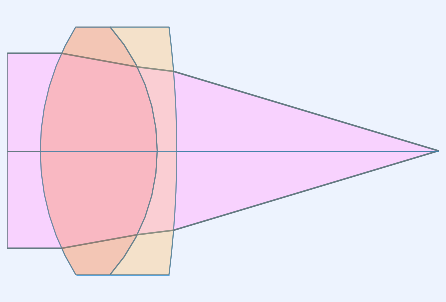

In [180]:
##so in this example "pupil is left and image is right"
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

In [ ]:
## create new model with surfaces reversed 

In [188]:
opm_1 = OpticalModel()
sm_1 = opm_1.seq_model
osp_1 = opm_1.optical_spec
pm_1 = opm_1.parax_model

In [189]:
#help(sm.gaps)

In [190]:
help(sm_1.add_surface)

Help on method add_surface in module rayoptics.seq.sequential:

add_surface(surf_data, **kwargs) method of rayoptics.seq.sequential.SequentialModel instance
    add a surface where surf is a list that contains:
    [curvature, thickness, refractive_index, v-number]



In [191]:
sm_1.add_surface([-0.0523560209424084, 2.0000, 'N-SF6HT', 'SCHOTT'])

In [192]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm_1,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

AttributeError: 'NoneType' object has no attribute 'imager_defined'

In [18]:
##apply translation in y to first surface of lens 
# define translation matricies for decenter
sm.ifcs[1].decenter = srf.DecenterData(DecenterType.LOCAL)
sm.ifcs[2].decenter = srf.DecenterData(DecenterType.REV)
# set second element of translation (y offset) to .2
sm.ifcs[1].decenter.dec[1] = .2
sm.ifcs[2].decenter.dec[1] = .2

In [ ]:
## in order to keep rays directed along axis when perturbing lens, set dummy plane separate from first (front) surface of lens]
opm.add_dummy_plane(idx=0)

In [26]:
sm.cur_surface
#set current surface (1 or newly created dummy plane) to stop
sm.set_stop()

1

In [27]:
sm.list_sg()

              c               mode        type        y       alpha
                      t           medium
 Obj:      0.00000                 
                1.00000e+10          air
Stop:      0.00000                 
                    0.00000          air
   2:      1.18217                       LOCAL    0.20000     0.0000
                   0.862527       D-ZK3M
   3:      0.00000                         REV    0.20000     0.0000
                   0.523243          air
   4:      0.00000                 
                   0.250000        N-BK7
   5:      0.00000                 
                   0.249999          air
 Img:      0.00000                 


In [28]:
opm.update_model()

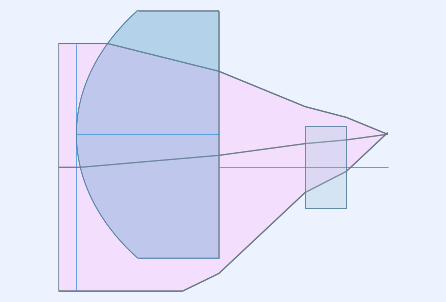

In [29]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()